In [10]:
import sys
sys.path.append("../modules/")
import object_dos1D
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [11]:
dos1=object_dos1D.dos_calculator(xnpix=400,E=1e-19)

In [12]:
dos1.return_lambda()
dos1.dbglambda
dos1.return_G0all1D()

<IPython.core.display.Javascript object>


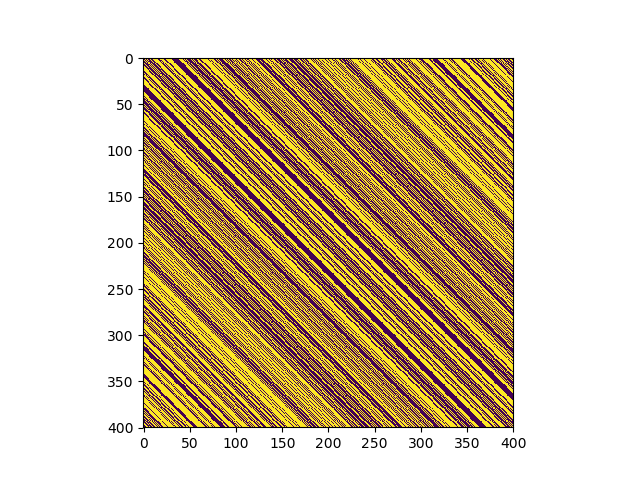

In [13]:
figure()
imshow(abs(dos1.G0all))
#colorbar()

<IPython.core.display.Javascript object>


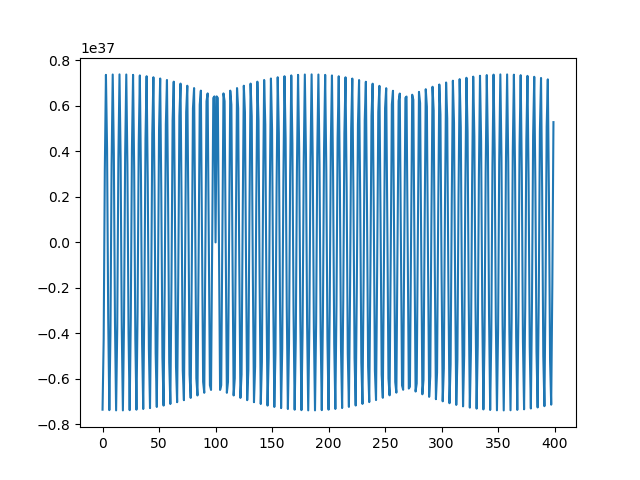

In [97]:
dos1.return_G01D(x_tip=100)
figure()
plot(real(dos1.G0.flatten()))

In [98]:
def return_gaussianV(xnpix=dos1.xnpix,ynpix=dos1.ynpix,pixwid=dos1.pixwid,x_imp=150,y_imp=1,sigma=1.,amp=0.0000002):
    gaussianV=np.zeros((xnpix,ynpix),dtype=np.float32)
    x,y=np.indices(gaussianV.shape)
    gaussianV=amp*(1./(2.*np.pi*sigma**2.))*np.exp(-((x-x_imp)**2.+(y-y_imp)**2.)/(2.*sigma**2.))
    return gaussianV

In [99]:
dos1.dbglambda

2.9824250884496837

<IPython.core.display.Javascript object>


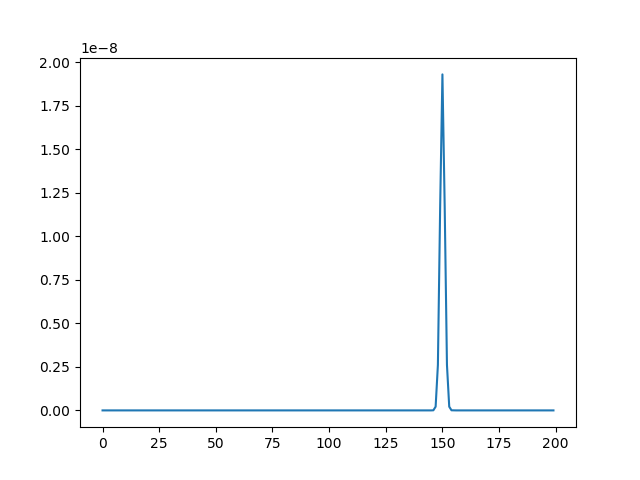

In [73]:
V=return_gaussianV()
figure()
plot(V)

<IPython.core.display.Javascript object>


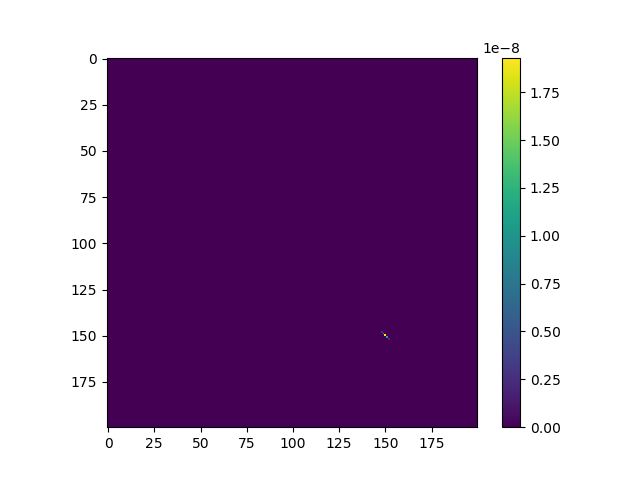

In [74]:
Vall=np.diag(V.ravel())
figure()
imshow(Vall)
colorbar()

In [75]:
dos1.get_Gnew(V=V)
dos2.get_Gnew(V=V)

<IPython.core.display.Javascript object>


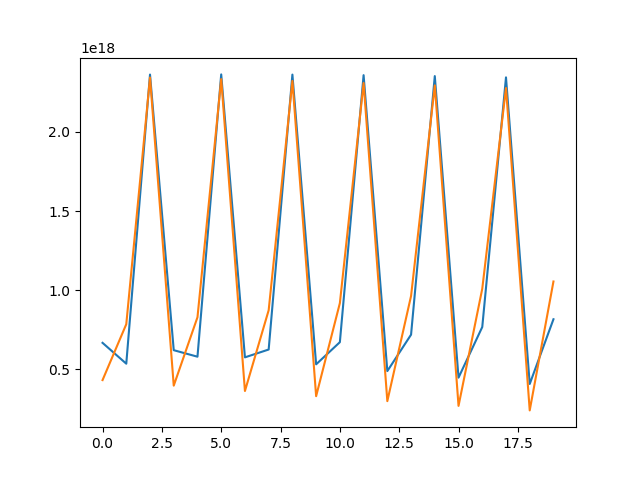

In [76]:
figure()
plot((abs(dos1.dos.flatten()[0:20])))
plot((abs(dos2.dos.flatten()[0:20])))
#plot(V*1e21)

<IPython.core.display.Javascript object>


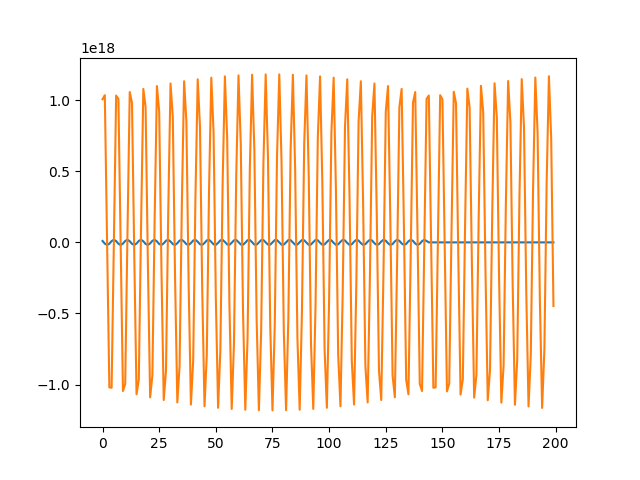

In [77]:
figure()
plot((imag(dos1.Gnew[:,75].reshape(dos1.xnpix,dos1.ynpix))))
plot((imag(dos1.G0all[:,75].reshape(dos1.xnpix,dos1.ynpix))))

In [104]:
k=0.2
r=np.arange(200)-100
g=np.exp(1j*k*r)/k

<IPython.core.display.Javascript object>


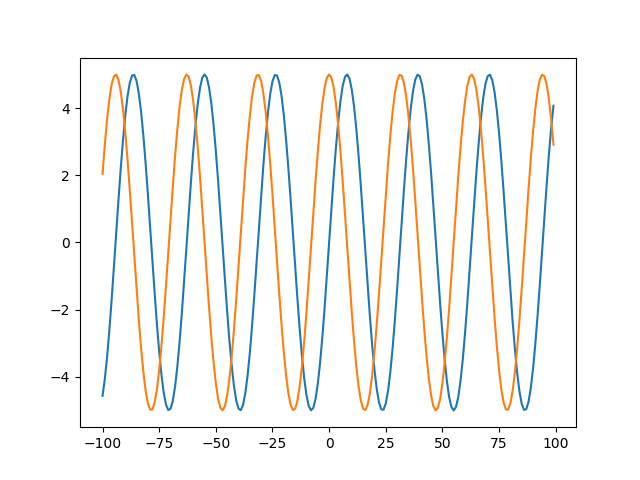

In [105]:
figure()
plot(r,imag(g))
plot(r,real(g))

In [16]:
I0=identity(dos1.xnpix,dtype=np.complex)

In [17]:
G0V=np.matmul(dos1.G0all,Vall)

In [18]:
Gnew=np.linalg.solve(I0-G0V,dos1.G0all)

In [19]:
dos=np.imag(np.diag(Gnew)).reshape(dos1.xnpix,dos1.ynpix)

<IPython.core.display.Javascript object>


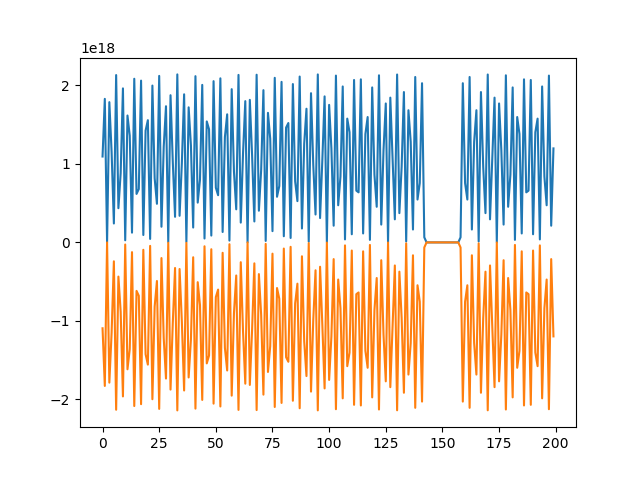

In [24]:
figure()
plot(abs(dos))
plot(dos1.dos.flatten())